### Notebook to plot evolution of galacto-centric distance

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import h5py

In [2]:
DATA_PATH = "../data/TangoSIDM/"

IDs = {
    "SigmaConstant00": "CDM",
    "SigmaConstant01": "SigmaConstant01",
    "SigmaConstant10": "SigmaConstant10",
    "SigmaVelDep20Anisotropic": "SigmaVel20",
    "SigmaVelDep60Anisotropic": "SigmaVel60", 
    "SigmaVelDep100Anisotropic": "SigmaVel100",
}

Data from matching halos between snapshots

In [3]:
def select_halos(id): 
    
    halo, subhalos = None, None
    
    if id == "SigmaConstant00":
        halo = 30
        subhalos = [266825, 267106, 266829, 266826, 266827, 
                    266830, 266835, 266832, 266839, 266838, 
                    266831, 266836, 266837, 267107, 266840, 266842]
        
    if id == "SigmaConstant01":
        halo = 31
        subhalos = [265554, 265803, 265557, 265555, 265558, 
                    265560, 265563, 265562, 265567, 265566, 
                    265561, 265564, 265565, 265559, 
                    265568, 265570]
        
    if id == "SigmaConstant10":
        halo = 29
        subhalos = [257892, 258114, 257896, 257894, 257893,
                    257897, 257899, 258115, 257903, 257902, 
                    257895, 257901, 257900, 257904, 257905, 257895]
        
    if id == "SigmaVelDep20Anisotropic":
        halo = 29
        subhalos = [265518, 265785, 265522, 265520, 265519, 
                    265523, 265527, 265524, 265531, 265530, 
                    265525, 265528, 265521, 265786, 
                    265532, 265534]
        
    if id == "SigmaVelDep60Anisotropic":
        halo = 29
        subhalos = [263801, 264064, 263805, 263803, 263802, 
                    263806, 263810, 264065, 263813, 263812, 
                    263808, 263809, 263811, 263807,
                    263814, 263815]
        
    if id == "SigmaVelDep100Anisotropic":
        halo = 29
        subhalos = [261828, 262076, 261832, 261830, 261829, 
                    261833, 261837,  262077, 261840, 261839, 
                    261835, 261836, 261838, 261834, 
                    261841, 261842]
        
    return halo, subhalos

Plotting routine

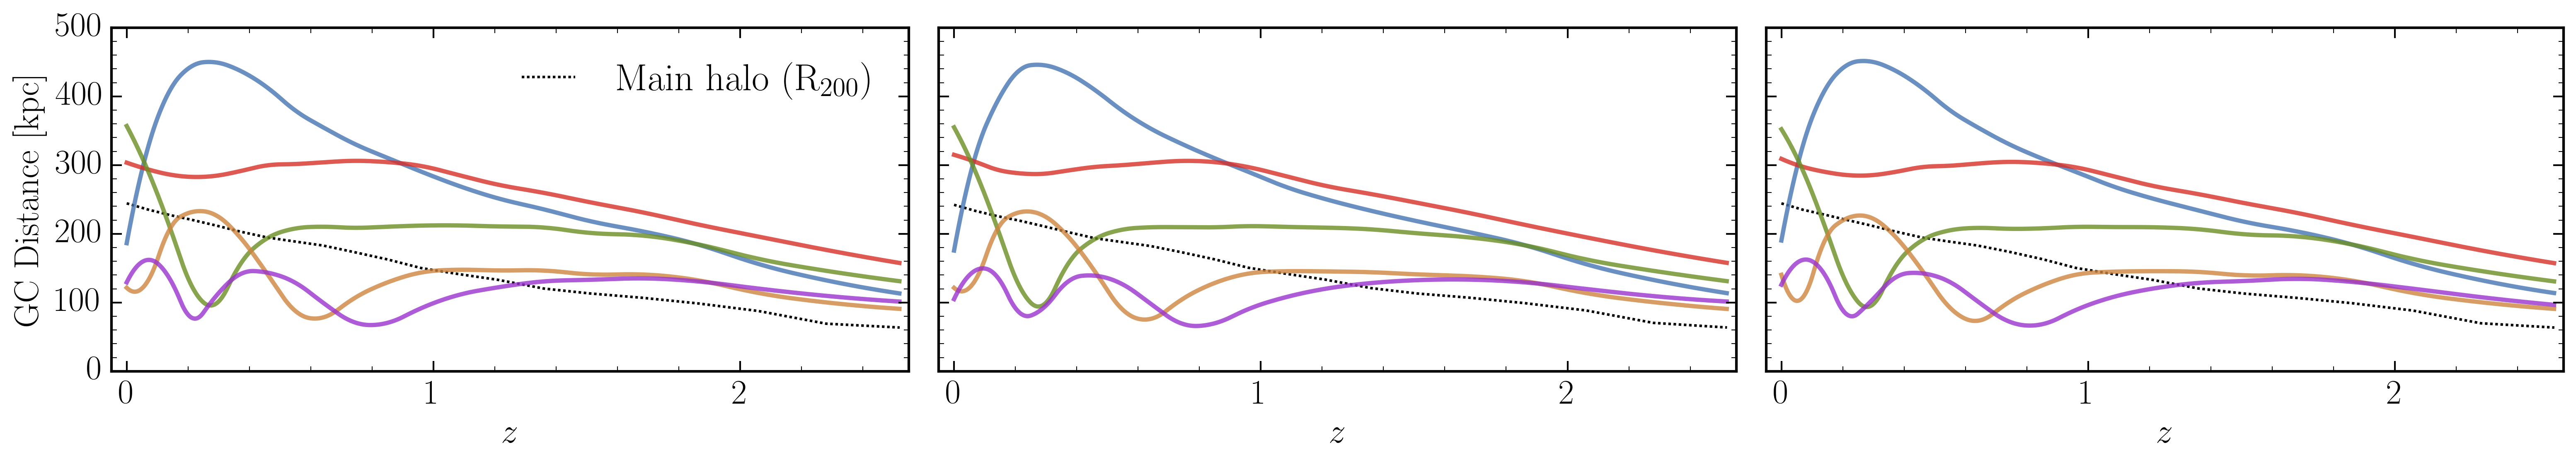

In [6]:
mycmap = matplotlib.cm.RdYlBu
myblue = mycmap(0.1)
myred =  mycmap(0.9)
colors = [myred, myblue, "olivedrab", "peru", "darkorchid"]

plt.style.use("pltstyle.mplstyle")


fig, axs = plt.subplots(1, 3, figsize=(21,4), dpi=300, facecolor='white')

for ai, box in enumerate(["SigmaConstant00", "SigmaConstant10", "SigmaVelDep60Anisotropic"]):
    halo, subhalos = select_halos(box)
    file = h5py.File(DATA_PATH+f"{box}.hdf5", "r")

    for idx in file.keys():
        if file[f'{idx}'].attrs.get('main_halo_of') is not None:
            if int(idx) == halo:

                # Get halo data
                halo_idx = idx
                tree_halo = file[f'{halo_idx}']['tree_data']
                redshift = tree_halo['redshift'][:]
                CoP_halo = tree_halo['CoP'][:]
                mass_halo = tree_halo['M200c'][:]
                R200_halo = tree_halo['R200c'][:] # kpc

                axs[ai].plot(redshift, R200_halo, ls=(0, (1, 1)), c='k', label=r'$\mathrm{Main\ halo\ (R_{{200}})}$')
                axs[ai].set_xlim(-.05, 2.55)
                axs[ai].set_ylim(0, 500)

                # Get its subhalos indeces
                subhalos_idxs = subhalos

                c = 0
                for i, subhalo_idx in enumerate(subhalos_idxs[:5]):
                    # Get subhalo data
                    tree_subhalo = file[f'{subhalo_idx}']['tree_data']
                    CoP_subhalo = tree_subhalo['CoP'][:]
                    mass_subhalo = tree_subhalo['M200c'][:]
                    subtype_subhalo = tree_subhalo['subtype'][:]
                    z_accr_type_idx, z_accr_type = tree_subhalo['accretion'][:]
                    z_pericenter_type, pericenter_type = tree_subhalo['pericenter'][:]
                    CoP = CoP_subhalo - CoP_halo # Mpc 
                    r = np.sqrt(np.sum(CoP ** 2, axis=1)) *1e3 # kpc

                    # Plot orbit and mass
                    f = interpolate.interp1d(redshift, r, kind="quadratic")
                    x = np.arange(redshift[0], redshift[-1], 0.001)

                    p = axs[ai].plot(x, f(x), alpha=0.8, c=colors[i], lw=2.5)
                    if i == 4 or i == 9 or i==14:
                        c += 4
                    if i == 14: break

                axs[ai].set_xlabel(r'${z}$')
                axs[ai].set_xticks([0, 1, 2])

    file.close()

axs[0].legend() 
axs[0].set_ylabel(r'$\mathrm{GC\ Distance\ [kpc]}$')
axs[0].set_yticks([0, 100, 200, 300, 400, 500])
axs[1].set_yticklabels([])
axs[2].set_yticklabels([])

plt.tight_layout()
fig.savefig(f"./figures/evolution.png", dpi=300, transparent=True)